In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
class Node:
    def __init__(self) -> None:
        self.preds = set()
        self.succs = set()
    
    @property
    def degree(self):
        return len(self.succs)# + len(self.preds) 
    

class Graph:
    def __init__(self, n) -> None:
        self.nodes = {i: Node() for i in range(n)}
    
    def add_edge(self, pred, succ):
        p = self.nodes[pred]
        s = self.nodes[succ]
        p.succs.add(succ)
        s.preds.add(pred)
    
    def remove_node(self, v):
        node = self.nodes[v]
        preds = node.preds
        succs = node.succs

        for p in preds:
            pred = self.nodes[p]
            pred.succs.remove(v)
            
        for s in succs:
            succ = self.nodes[s]
            succ.preds.remove(v)
            
        for p in preds:
            pred = self.nodes[p]
            for s in succs:
                if p == s:
                    continue
                succ = self.nodes[s]
                pred.succs.add(s)
                succ.preds.add(p)
        
        self.nodes.pop(v)
        
    def get_lowest_degree(self):
        e, best = None, int(1e6)
        for v, node in self.nodes.items():
            degree = node.degree
            if degree < best:
                e = v
                best = degree
        return e
    
    
    def to_dot(self):
        dot = 'digraph {\n'
        dot += '\n'.join([
            f'\t{v} -> {str(node.succs) if node.succs else "{}"}' for v, node in self.nodes.items()
        ])
        dot += '\n}'
        return dot
            
    @staticmethod
    def FromMatrix(A, epsilon=1e-6):
        rows, cols = A.shape
        graph = Graph(max(rows, cols))
        for row in range(rows):
            for col in range(cols):
                if row != col and abs(A[row][col]) > epsilon:
                    graph.add_edge(row, col)
        return graph

In [106]:
n = 200
A = np.eye(n, n)
B = np.random.rand(n, n)
B[B > 0.05] = 0
A[0, :] = 1
A[:, 0] = 1
A += B

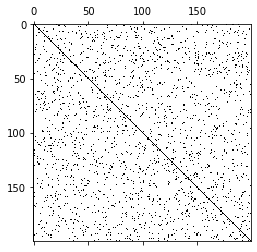

In [107]:
plt.spy(A)


In [112]:
def reorder(A):
    A_copy = A.copy()
    graph = Graph.FromMatrix(A)
    dot = graph.to_dot()
    rows = A.shape[0]
    ordering = list(range(rows))
    for row in range(rows):
        v = graph.get_lowest_degree()
        best_row = ordering.index(v)
        ordering[row], ordering[best_row] = ordering[best_row], ordering[row]
        A_copy[[row, best_row], :] = A_copy[[best_row, row], :]
        graph.remove_node(v)
    return A_copy, dot

In [113]:
ordered_A, dot = reorder(A)

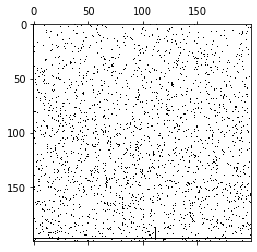

In [114]:
plt.spy(ordered_A)